# PCA

In [102]:
#initializing the libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading in the Dataframe

In [103]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')
df.head()

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0


In [104]:
# create a df with only the pokemon_generation column
df_gen = df[['pokemon_generation']]
df_gen

,pokemon_generation
0,9
1,9
2,8
3,9
4,5
...,...
4447,3
4448,9
4449,8
4450,8


### Preparing the DF to conduct PCA. We will have to remove any labels, and non-quantitative data.

In [105]:
# removing the pokemon name, item, ability, tera type, move names, tounrament, typing, move effect as these are all qualitative and not needed for the model.
df = df.drop(['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4', 'tournament', 'type_one', 'type_two','type', 'move_1_effect', 'move_2_effect', 'move_3_effect', 'move_4_effect'  ], axis=1)
# removing the rank, pokemon_generation, and move_generations as these are labels and not needed for the model.
df = df.drop(['rank','pokemon_generation', 'move_1_generation', 'move_2_generation', 'move_3_generation', 'move_4_generation'], axis=1)
# cleaning the df for the NaN values to be replaced with 0 as it reflects either moves with 0 base power or 0 effect chance
df = df.fillna(0)
df

,wins,losses,stat_total,hp,attack,defense,special_attack,special_defense,speed,move_1_power,...,move_1_accuracy,move_2_power,move_2_effect_chance,move_2_accuracy,move_3_power,move_3_effect_chance,move_3_accuracy,move_4_power,move_4_effect_chance,move_4_accuracy
0,9,2,670,100,85,100,135,115,135,100.0,...,100.0,130.0,100.0,90.0,80.0,0.0,100.0,70.0,0.0,100.0
1,9,2,550,80,120,84,60,96,110,0.0,...,100.0,100.0,0.0,100.0,120.0,0.0,100.0,0.0,0.0,100.0
2,9,2,550,100,130,100,63,60,97,0.0,...,100.0,25.0,0.0,100.0,120.0,100.0,100.0,40.0,0.0,100.0
3,9,2,570,154,140,108,50,68,50,75.0,...,100.0,90.0,0.0,100.0,40.0,100.0,100.0,0.0,0.0,100.0
4,9,2,480,60,67,85,77,75,116,95.0,...,100.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,5,4,440,60,50,100,95,70,65,0.0,...,100.0,0.0,0.0,100.0,110.0,30.0,70.0,50.0,0.0,100.0
4448,5,4,550,87,60,95,133,91,84,0.0,...,100.0,0.0,0.0,100.0,120.0,0.0,100.0,80.0,20.0,100.0
4449,5,4,510,95,120,65,95,75,60,0.0,...,100.0,0.0,0.0,100.0,0.0,0.0,90.0,95.0,0.0,100.0
4450,5,4,550,100,130,100,63,60,97,0.0,...,100.0,120.0,100.0,100.0,25.0,0.0,100.0,70.0,0.0,100.0


### Verifying that there are no missing values within the DF

In [106]:
# checking for missing values
df.isnull().sum()


wins                    0
losses                  0
stat_total              0
hp                      0
attack                  0
defense                 0
special_attack          0
special_defense         0
speed                   0
move_1_power            0
move_1_effect_chance    0
move_1_accuracy         0
move_2_power            0
move_2_effect_chance    0
move_2_accuracy         0
move_3_power            0
move_3_effect_chance    0
move_3_accuracy         0
move_4_power            0
move_4_effect_chance    0
move_4_accuracy         0
dtype: int64

### Verifying the Data Types

In [107]:
# checking the data types
df.dtypes

wins                      int64
losses                    int64
stat_total                int64
hp                        int64
attack                    int64
defense                   int64
special_attack            int64
special_defense           int64
speed                     int64
move_1_power            float64
move_1_effect_chance    float64
move_1_accuracy         float64
move_2_power            float64
move_2_effect_chance    float64
move_2_accuracy         float64
move_3_power            float64
move_3_effect_chance    float64
move_3_accuracy         float64
move_4_power            float64
move_4_effect_chance    float64
move_4_accuracy         float64
dtype: object

Text(0, 0.5, 'Count')

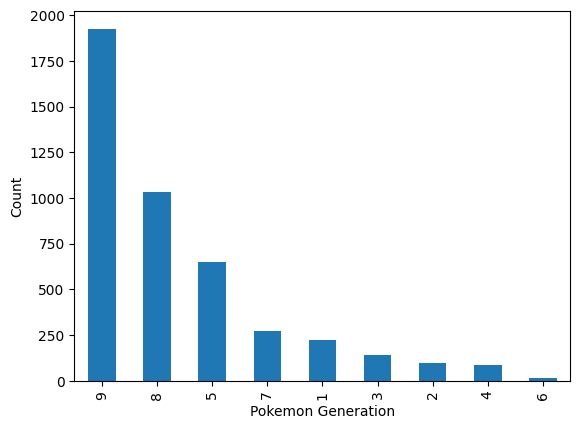

In [108]:
# Class Plots
df_gen['pokemon_generation'].value_counts().plot(kind='bar')
plt.xlabel('Pokemon Generation')
plt.ylabel('Count')


### Normalizing the Data

In [109]:
# normalizeing the data using sklearn standard scaler
X = df.iloc[:, 1:].values
X_normal = StandardScaler().fit_transform(X)
X_normal


array([[-1.5390364 ,  2.09297836,  0.22907806, ...,  1.01849493,
        -0.43200673,  0.18159955],
       [-1.5390364 ,  0.09472836, -0.57002519, ..., -0.73669765,
        -0.43200673,  0.18159955],
       [-1.5390364 ,  0.09472836,  0.22907806, ...,  0.26626954,
        -0.43200673,  0.18159955],
       ...,
       [ 0.42647997, -0.57135497,  0.02930225, ...,  1.64534942,
        -0.43200673,  0.18159955],
       [ 0.42647997,  0.09472836,  0.22907806, ...,  1.01849493,
        -0.43200673,  0.18159955],
       [ 0.42647997, -0.23831331,  0.22907806, ...,  1.01849493,
        -0.43200673,  0.18159955]])

In [110]:
pca = PCA()

principalComponents = pca.fit_transform(X_normal)


In [115]:
principalDF = pd.DataFrame(data = principalComponents)
#change the column names to reflect the principal components
principalDF = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18', 'principal component 19', 'principal component 20'])

# adding the pokemon generation column back to the df
principalDF['pokemon_generation'] = df_gen
# moving the pokemon generation column to the front of the df
cols = principalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
principalDF = principalDF[cols]

principalDF

,pokemon_generation,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,9,-0.574538,-3.208184,2.246382,-1.818557,-0.815045,-1.063978,-0.402608,1.147849,-0.201634,...,-0.725742,-0.262233,-0.668942,-0.262577,0.249319,0.475055,0.215695,-0.356146,-0.703686,-5.154578e-15
1,9,-0.457116,-0.217369,0.262539,-0.320000,-1.516656,1.734299,-0.832621,1.182054,0.101326,...,-0.309053,-0.306503,1.799970,-0.602977,0.839027,-0.559743,0.401265,-0.306799,-0.016258,-2.319158e-14
2,8,-1.569794,0.934974,0.941676,1.552161,-1.259356,2.420197,-1.937021,0.229468,0.577317,...,0.522694,0.413695,-0.046393,-0.153599,0.011744,0.212176,-0.641198,-0.169337,-0.110223,-6.616605e-15
3,9,-2.871787,1.719204,0.097640,-0.021566,0.275865,-0.005726,-2.908579,-0.035870,0.593858,...,0.787584,0.899244,0.137276,0.664657,-0.771035,-0.246752,0.367111,-0.204938,-0.267744,1.271107e-14
4,5,1.762990,0.136634,-1.954814,-0.117466,0.018084,0.862751,-0.631472,1.420703,-0.439159,...,0.550343,0.011838,-0.930392,-0.150520,0.655620,0.327318,-0.985648,0.298710,-0.719266,-8.293775e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,3,2.212119,1.834197,0.977092,1.919506,-0.856979,0.944353,-0.302587,-0.794379,0.974134,...,-0.824323,-0.774354,-0.052994,-0.547481,1.486100,0.612461,-0.365738,2.687933,-0.234540,-1.628157e-18
4448,9,0.591843,-0.674730,0.632469,2.255719,-0.805640,0.254500,0.441496,-0.421780,0.096831,...,-2.166616,-0.197996,0.144083,-0.826760,0.775720,0.412882,-1.032451,0.209725,-0.254317,6.031754e-17
4449,8,0.727744,1.461865,-0.322285,1.306471,-0.704532,0.837364,0.884554,-0.237468,-0.870204,...,-1.555881,0.571058,-0.545100,0.646994,-1.012605,0.514209,0.692730,0.754347,0.949545,1.160700e-16
4450,8,-1.824443,0.827216,0.743839,-0.955716,-1.150627,0.181605,2.735427,1.582275,1.793420,...,0.554327,0.906682,-0.652595,0.776272,-0.049020,0.575912,-0.208143,0.305232,-0.010929,-3.437779e-17


In [119]:
# computing the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# cummulating the explained variance to 4 decimal places
pca.explained_variance_ratio_.cumsum().round(4)

#
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance



array([0.14620027, 0.28101534, 0.37309836, 0.44541807, 0.50966359,
       0.56515768, 0.6167254 , 0.66646609, 0.71553797, 0.76173179,
       0.8047196 , 0.84019201, 0.87257349, 0.90101623, 0.92851569,
       0.95154395, 0.97105359, 0.98873177, 1.        , 1.        ])

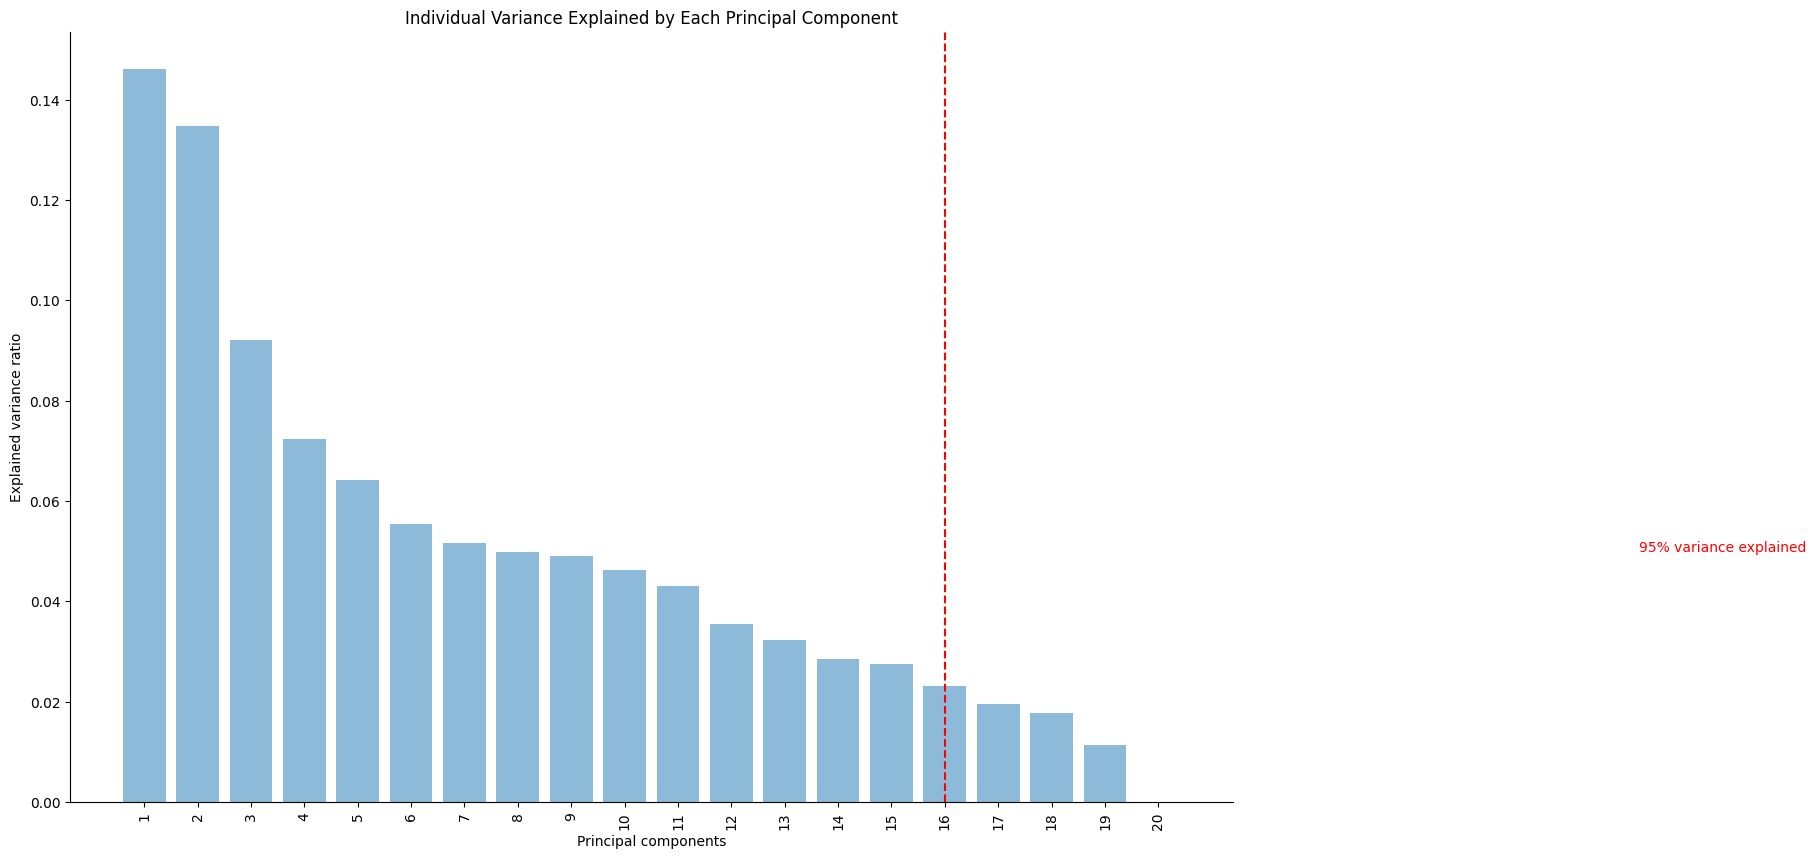

In [122]:
#
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
# make the x-axis labels vertical
plt.xticks(rotation=90)
# make the plot bigger so we can read the x-axis labels
plt.gcf().set_size_inches(15, 10)
#put a vertical line at 16 and call it the '95% variance explained' line
plt.axvline(x=16, color='r', linestyle='--')
#put a label on the dashed line and call it the '95% variance explained' line
plt.text(29, 0.05, '95% variance explained', color = 'red')
#removing the grid lines
plt.grid(False)
#removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [123]:
# creating a new df with only the first 2 principal components
principalDF_2 = principalDF[['principal component 1', 'principal component 2', 'pokemon_generation']]
principalDF_2

,principal component 1,principal component 2,pokemon_generation
0,-0.574538,-3.208184,9
1,-0.457116,-0.217369,9
2,-1.569794,0.934974,8
3,-2.871787,1.719204,9
4,1.762990,0.136634,5
...,...,...,...
4447,2.212119,1.834197,3
4448,0.591843,-0.674730,9
4449,0.727744,1.461865,8
4450,-1.824443,0.827216,8


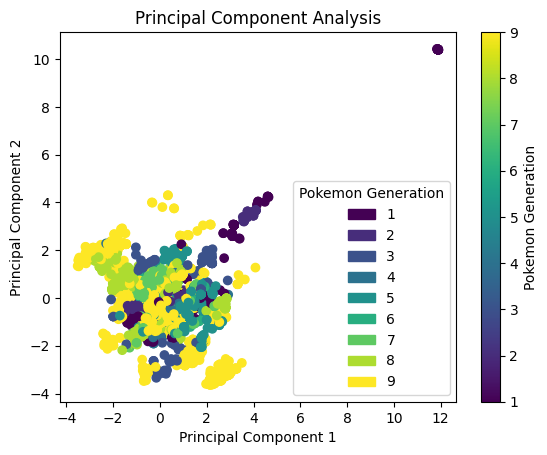

In [137]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a scatter plot
plt.figure()
scatter = plt.scatter(principalDF_2['principal component 1'], principalDF_2['principal component 2'], 
                      c=principalDF_2['pokemon_generation'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')

# Create a color bar
plt.colorbar(scatter, label='Pokemon Generation')

# Generate custom legend by manually creating handles
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=str(i)) for i in range(1, 10)]
plt.legend(handles=handles, title='Pokemon Generation')
#drop the color bar from the visualization
#plt.colorbar(scatter, label='Pokemon Generation').remove()

plt.show()



In [138]:
# creating a new df with only the first 3 principal components
principalDF_3 = principalDF[['principal component 1', 'principal component 2', 'principal component 3', 'pokemon_generation']]
principalDF_3

,principal component 1,principal component 2,principal component 3,pokemon_generation
0,-0.574538,-3.208184,2.246382,9
1,-0.457116,-0.217369,0.262539,9
2,-1.569794,0.934974,0.941676,8
3,-2.871787,1.719204,0.097640,9
4,1.762990,0.136634,-1.954814,5
...,...,...,...,...
4447,2.212119,1.834197,0.977092,3
4448,0.591843,-0.674730,0.632469,9
4449,0.727744,1.461865,-0.322285,8
4450,-1.824443,0.827216,0.743839,8


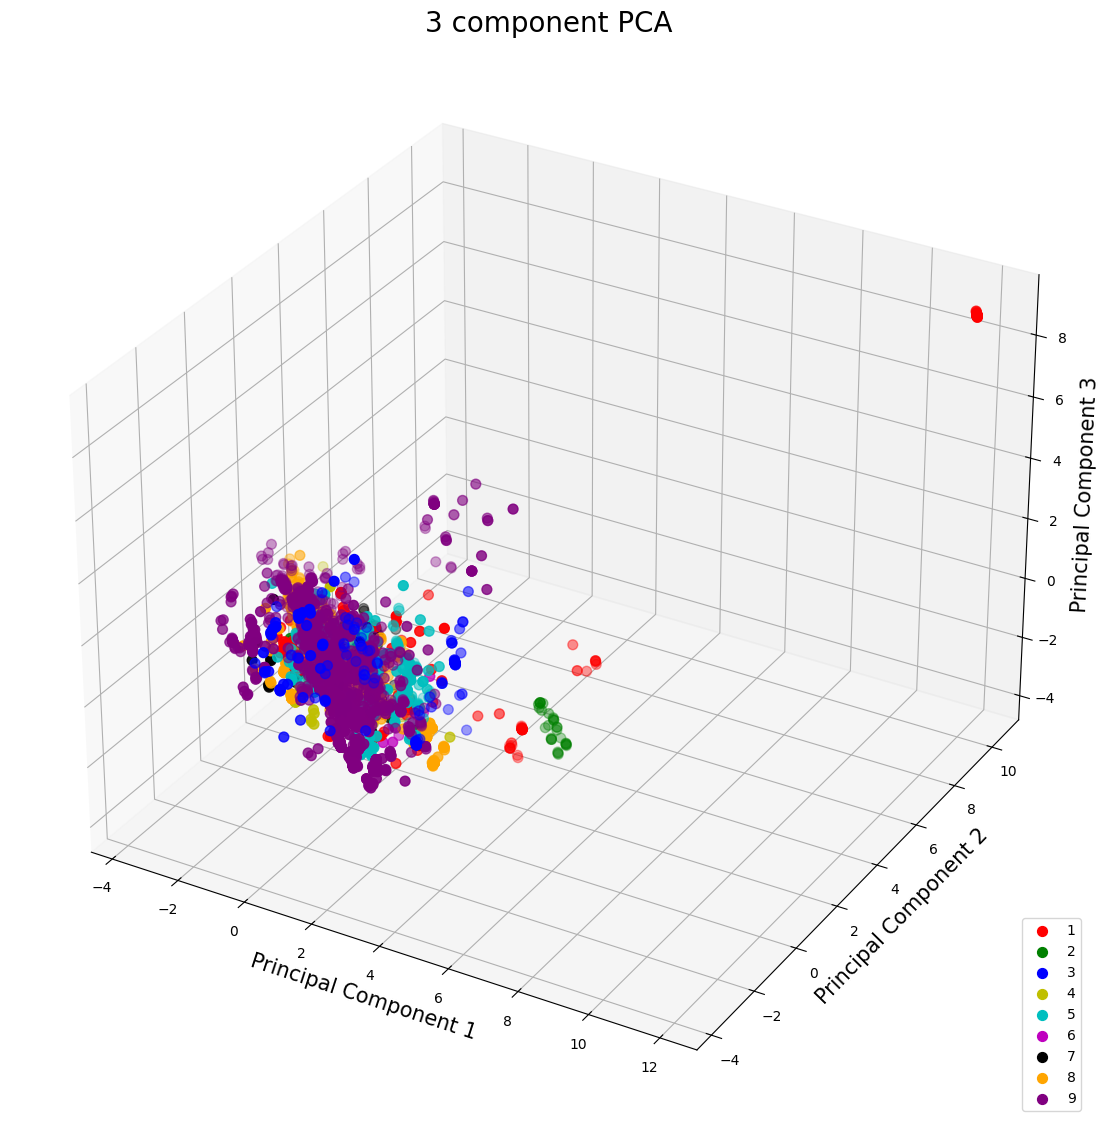

In [146]:
fig = plt.figure(figsize = (16,14))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targetsName = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

targets = [1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF_3['pokemon_generation'] == target
    ax.scatter(  principalDF_3.loc[indicesToKeep, 'principal component 1']
               , principalDF_3.loc[indicesToKeep, 'principal component 2']
               , principalDF_3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targetsName)
#move the legend to being in the plot
ax.legend(targetsName, loc='lower right')
ax.grid()